# Feature Engineering - Transformation (log transform)

* It helps to handle skewed data and after transformation, the distribution becomes more approximate to normal
* It also decreases the effect of the outliers due to the normalization of magnitude differences and the model become more robust
* The data you apply log transform to must have only positive values, otherwise you receive an error

Some machine learning algorithms like linear and logistic assume that the features are normally distributed so if the feature is not normally distributed then to make it normal distribution we use some transformation techniques below are those:


- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation

### First question in our mind how to check the feature is normally distributed or not?
Ans : QQ plot

In [1]:
# general code for qq plot

import scipy.stats as stat
import pylab

#  QQ plot

def plot_data(df,feature):
    plt.figure(figsize=(9,3))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Fare', 'Survived'])

In [4]:
#  Removing null values with median in age column
df['Age'].fillna(df.Age.median(), inplace = True)

In [5]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

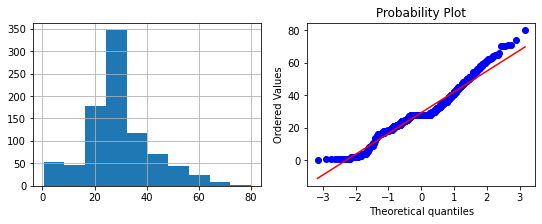

In [6]:
# applying qq plot for age column
plot_data(df,'Age')

## 1) Logarithmic Transformation

In [7]:
## applying logarithimic transformation
# here we are creating new column and applying transformation for age column
df['Age_log'] = np.log(df['Age'])

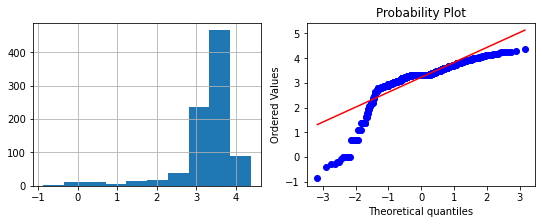

In [8]:
## To check : use qq plot :) :)
plot_data(df,'Age_log')

## 2) Reciprocal Transformation

In [9]:
## applying logarithimic transformation
# here we are creating new column and applying transformation for age column
df['Age_reciprocal'] = 1/df.Age

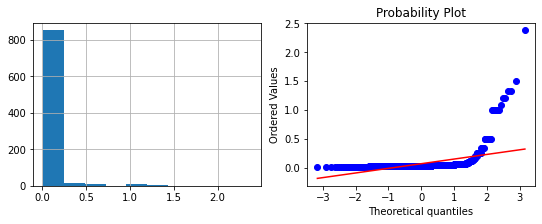

In [10]:
## To check : use qq plot :) :)
plot_data(df,'Age_reciprocal')

## 3) Square Root Transformation

In [11]:
df['Age_sqaure'] = df.Age**(1/2)

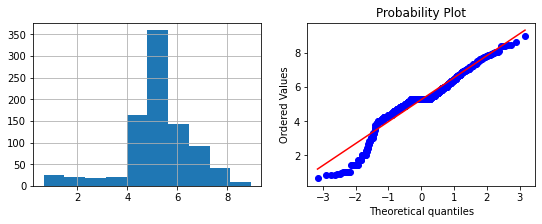

In [12]:
plot_data(df,'Age_sqaure')

## 4) Exponential Transdormation

In [13]:
df['Age_exponential'] = df.Age**(1/1.2)

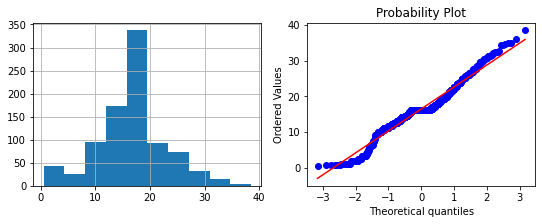

In [14]:
plot_data(df,'Age_exponential')

## 5) BoxCOx Transformation

* The Box-Cox transformation is defined as:

   T(Y)=(Y exp(λ)−1)/λ

* where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

* To know more info : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html

In [15]:
df['Age_Boxcox'],parameters = stat.boxcox(df['Age'])

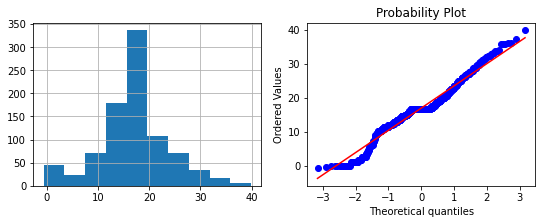

In [16]:
plot_data(df,'Age_Boxcox')

## Conclusion: 

So if we observe all the transforationn and their graphs for age column we can see that exponential and boxcox transformation gives good results

In [17]:
## if you want to show all this graphs in one cell of code use the below code

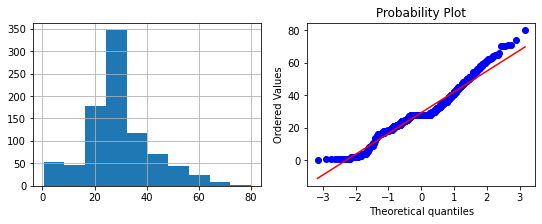



Log Transformation




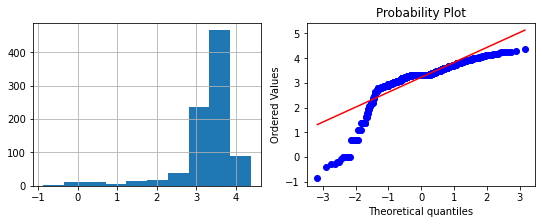



Reciprocal Transformation




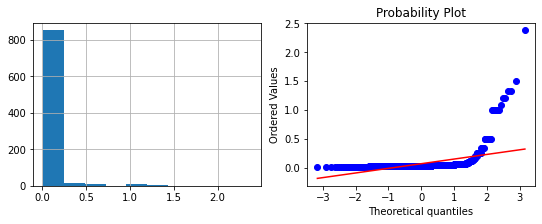

In [18]:
import scipy.stats as stat
import pylab


def plot_data(df,feature):
    plt.figure(figsize=(9,3))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
     
plot_data(df,'Age')


print('\n')
print('Log Transformation')
print('\n')
df['Age_log'] = np.log(df['Age'])
plot_data(df,'Age_log')

print('\n')
print('Reciprocal Transformation')
print('\n')
df['Age_reciprocal'] = 1/df.Age
plot_data(df,'Age_reciprocal')

# print('\n')
# print('Square Transformation')
# print('\n')
# df['Age_sqaure'] = df.Age**(1/2)
# plot_data(df,'Age_sqaure')

# print('\n')
# print('Exponential Transformation')
# print('\n')
# df['Age_exponential'] = df.Age**(1/1.2)
# plot_data(df,'Age_exponential')

# print('\n')
# print('BocCox Transformation')
# print('\n')
# df['Age_Boxcox'],parameters = stat.boxcox(df['Age'])
# plot_data(df,'Age_Boxcox')

## To see the distribution is happening before and after the transformation

<AxesSubplot:title={'center':'After applying Reciprocal Trandormation'}>

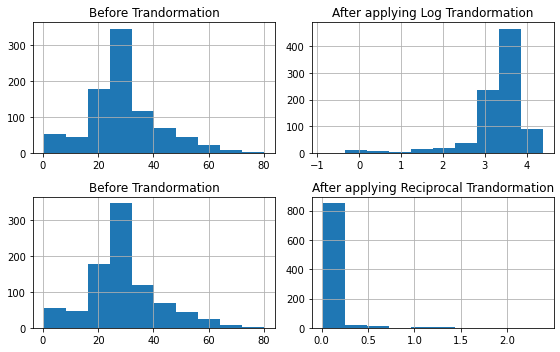

In [19]:
f = plt.figure(figsize=(8,5))

plt.subplot(2,2,1)
plt.tight_layout()
plt.title('Before Trandormation')
df['Age'].hist()


plt.subplot(2,2,2)
plt.tight_layout()
plt.title('After applying Log Trandormation')
df['Age_log'].hist()


plt.subplot(2,2,3)
plt.tight_layout()
plt.title('Before Trandormation')
df['Age'].hist()


plt.subplot(2,2,4)
plt.tight_layout()
plt.title('After applying Reciprocal Trandormation')
df['Age_reciprocal'].hist()

# To do all this transformation in feature_engine module :

## 1) Logarithmic transformation

In [20]:
from feature_engine import transformation as vt

tf = vt.LogTransformer(variables = ['col_name', 'col_name'], base='e')

# base: Indicates if the natural or base 10 logarithm should be applied. Can take values ‘e’ or ‘10’.

## 2) Reciprocal transformation

In [21]:
from feature_engine import transformation as vt

tf = vt.ReciprocalTransformer(variables = ['col_name', 'col_name'])

## 3) Exponential transformation or PowerTransformer

In [22]:
from feature_engine import transformation as vt

tf = vt.PowerTransformer(variables = ['col_name', 'col_name'], exp=0.5)

# exp: The power (or exponent). (default=0.5)

## 4) Boxcox transformation

In [23]:
from feature_engine import transformation as vt

tf = vt.BoxCoxTransformer(variables = ['col_name', 'col_name'])

## 5) YeoJohnsonTransformer

* for more info use this link : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html

<img src="YeoJohnsonTransformer image.png">

In [24]:
from feature_engine import transformation as vt

tf = vt.YeoJohnsonTransformer(variables = ['col_name', 'col_name'])

###### if you wanto to directly fit to the data

tf.fit(df)

###### if you want to fit the data to both tainning and testing

tf.fit(X_train)

###### transform the data

train_t = tf.transform(X_train)

test_t = tf.transform(X_test)